In [1]:
import os
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
csv_train_path = "/content/drive/MyDrive/Colab Notebooks/train.csv"
df_train= pd.read_csv(csv_train_path)

In [3]:
print(df_train.head())

                            md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  fd06d13de341cc75ad679916c5d7e6a6                  4                    4   
1  a4bb4e5206c4e89a303f470576fc5253                  1                    1   
2  c94ce27e389f96bda998e7c3fa5c4a2e                  5                    5   
3  ebcf2b50dd943c700d4e2b586fcd4425                  3                    3   
4  c77d6c895f05fea73a8f3704307036c0                  1                    1   

                              label nine_partition_label  \
0                 prurigo-nodularis     benign-epidermal   
1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                            keloid         inflammatory   
3              basal-cell-carcinoma  malignant-epidermal   
4                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  
0                benign           NaN         34  
1             malignant           NaN         12  
2        no

In [4]:
print("Columns in dataset:", df_train.columns)

Columns in dataset: Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'label',
       'nine_partition_label', 'three_partition_label', 'qc', 'ddi_scale'],
      dtype='object')


In [5]:
print("Unique value counts per column:")

#used nunique() to get the number of unique values
print(df_train.nunique())

Unique value counts per column:
md5hash                  2860
fitzpatrick_scale           7
fitzpatrick_centaur         7
label                      21
nine_partition_label        7
three_partition_label       3
qc                          5
ddi_scale                   4
dtype: int64


In [6]:
# Dropped the 'md5hash' column bc its like an ID
df_train_new = df_train.drop(columns=["md5hash"])

# Displayed the first few rows to make sure that "md5hash" was dropped
print(df_train_new.head())

   fitzpatrick_scale  fitzpatrick_centaur                             label  \
0                  4                    4                 prurigo-nodularis   
1                  1                    1  basal-cell-carcinoma-morpheiform   
2                  5                    5                            keloid   
3                  3                    3              basal-cell-carcinoma   
4                  1                    1                 prurigo-nodularis   

  nine_partition_label three_partition_label            qc  ddi_scale  
0     benign-epidermal                benign           NaN         34  
1  malignant-epidermal             malignant           NaN         12  
2         inflammatory        non-neoplastic  1 Diagnostic         56  
3  malignant-epidermal             malignant           NaN         34  
4     benign-epidermal                benign           NaN         12  


In [7]:
# used a list comprehension to loop through each column and check if it has more than 1 unique value
#if the column has more than 1 unique value it gets added to the categorical_column list
categorical_columns = [col for col in df_train_new.columns if df_train_new[col].nunique()]

print("Categorical columns selected for visualization:", categorical_columns)

Categorical columns selected for visualization: ['fitzpatrick_scale', 'fitzpatrick_centaur', 'label', 'nine_partition_label', 'three_partition_label', 'qc', 'ddi_scale']


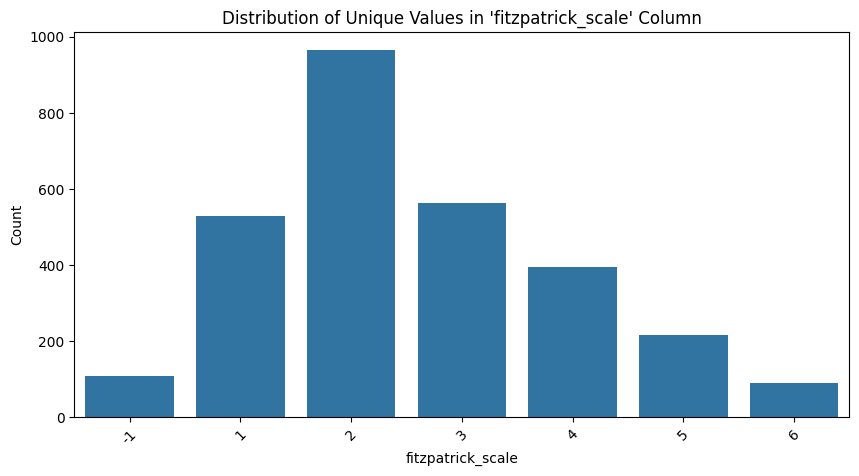

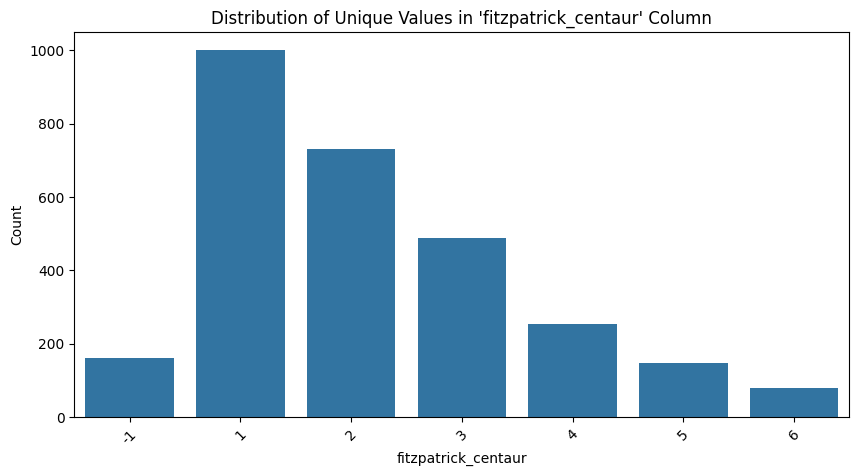

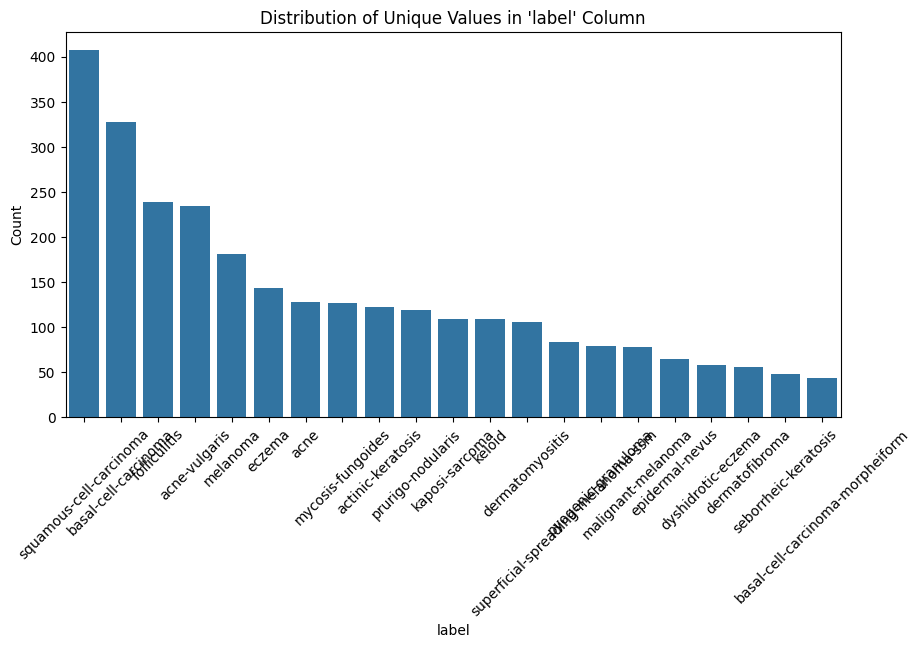

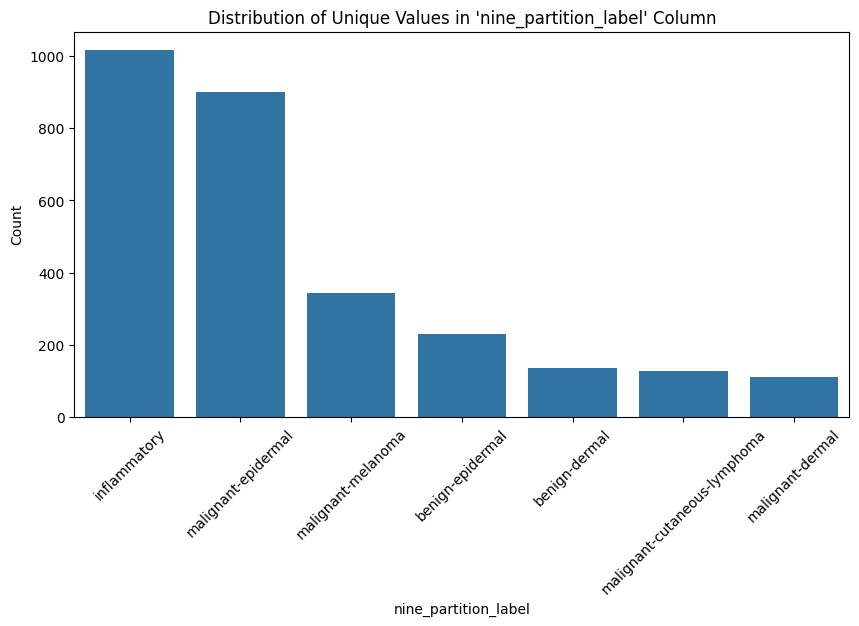

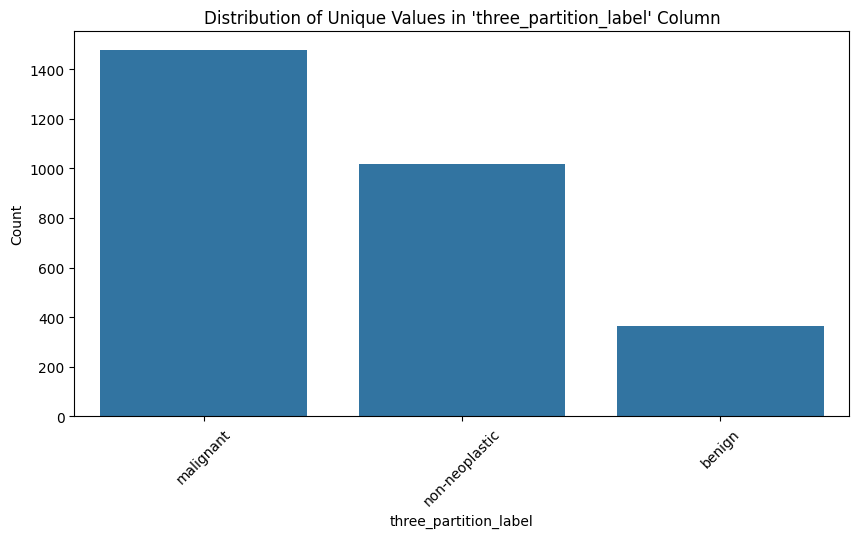

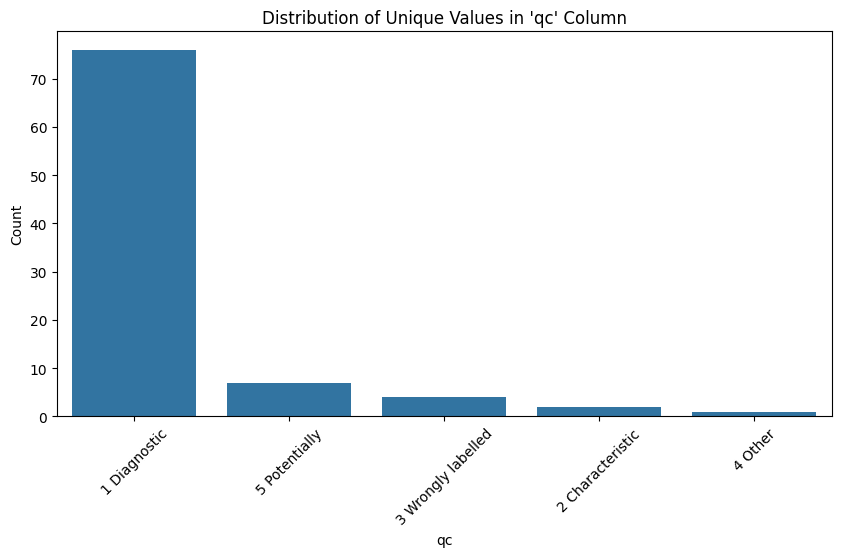

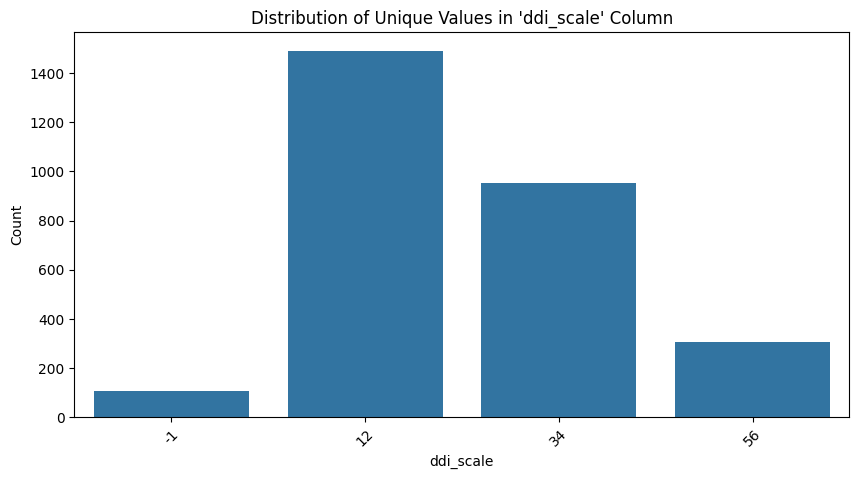

In [8]:
#used a for loop to plot the data from each of the columns
# the x-axis plots the unique items in the column
# y-axis: total count of each unique item
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    value_counts = df_train_new[col].value_counts()  # Count unique values

    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of Unique Values in '{col}' Column")
    plt.xticks(rotation=45)
    plt.show()

In [9]:
csv_path_test = "/content/drive/MyDrive/Colab Notebooks/test.csv"
df_test = pd.read_csv(csv_path_test)

In [10]:
print("Columns in dataset:", df_test.columns)

Columns in dataset: Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'qc',
       'ddi_scale'],
      dtype='object')


In [11]:
print("Unique value counts per column:")
#used nunique() to get the number of unique values
print(df_test.nunique())

Unique value counts per column:
md5hash                1227
fitzpatrick_scale         7
fitzpatrick_centaur       7
qc                        4
ddi_scale                 4
dtype: int64


In [12]:
df_test_new = df_test.drop(columns=["md5hash"])

In [13]:
categorical_columns = [col for col in df_test_new.columns if df_test_new[col].nunique()]

print("Categorical columns selected for visualization:", categorical_columns)

Categorical columns selected for visualization: ['fitzpatrick_scale', 'fitzpatrick_centaur', 'qc', 'ddi_scale']


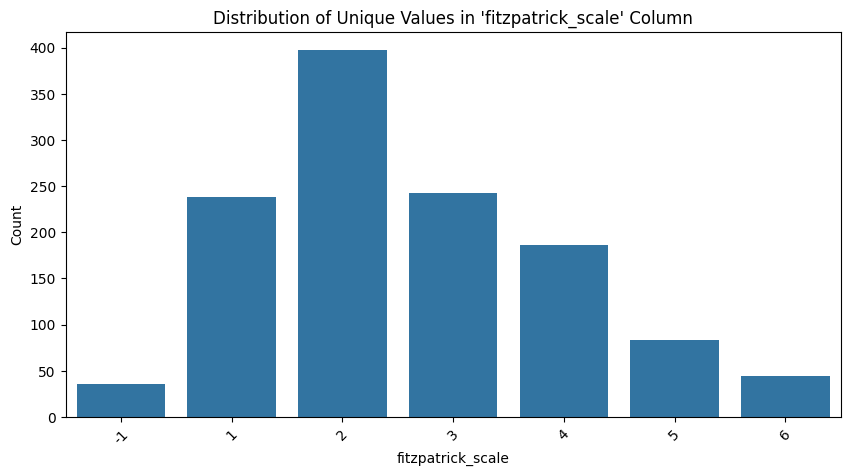

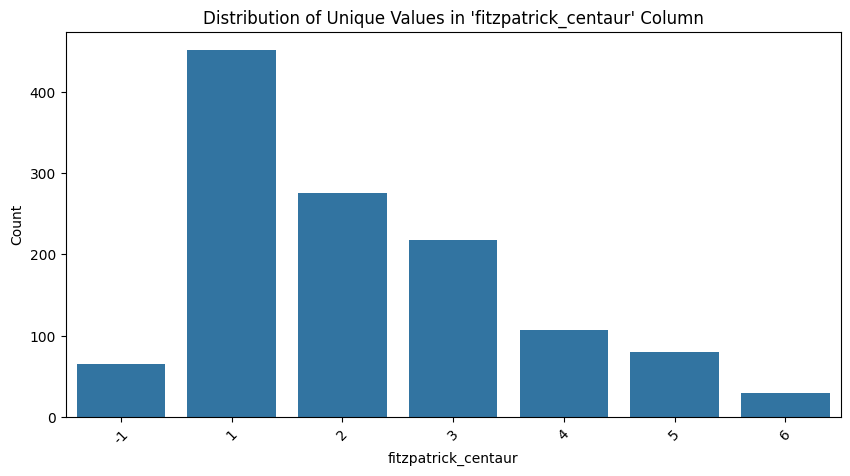

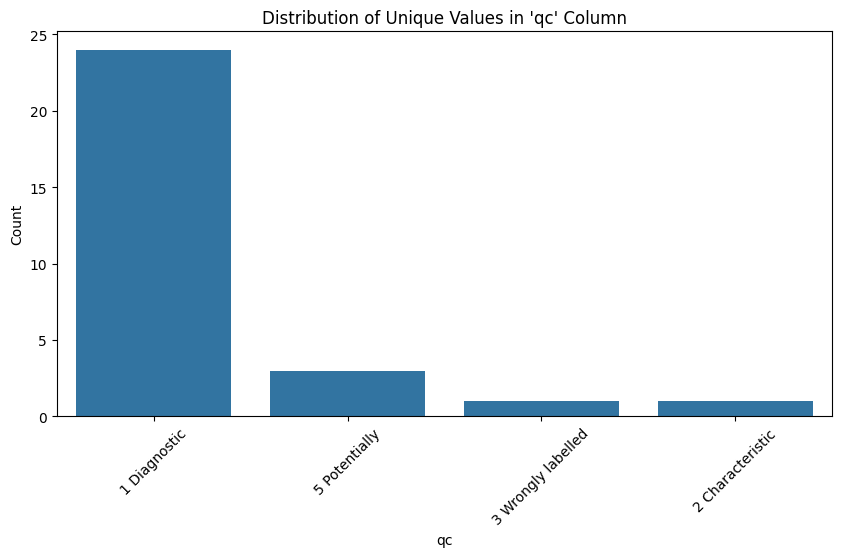

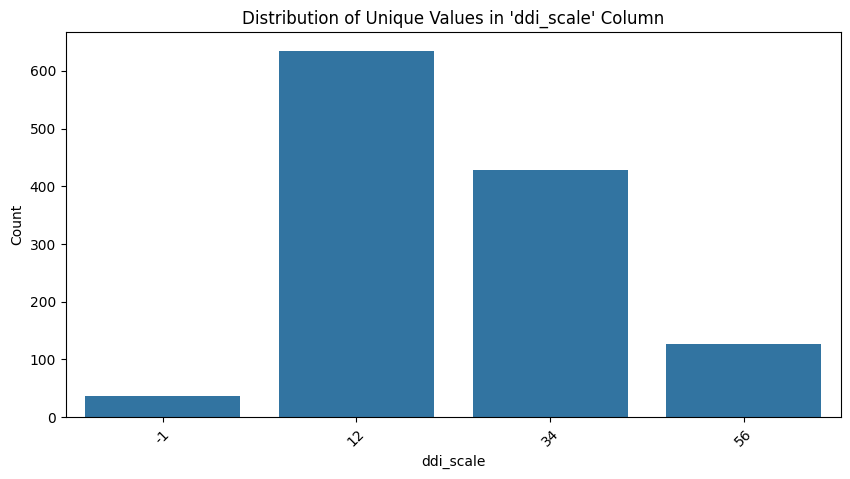

In [14]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    value_counts = df_test_new[col].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of Unique Values in '{col}' Column")
    plt.xticks(rotation=45)
    plt.show()